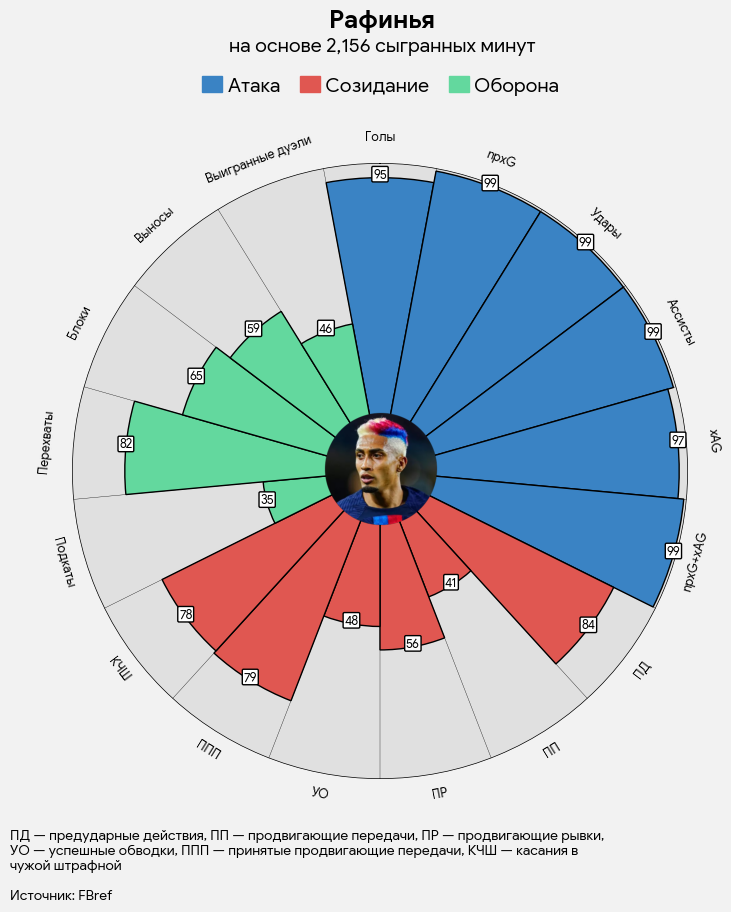

In [53]:
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
from pyfonts import load_font

font_regular = load_font(
    font_url="https://github.com/SavaMaksimtsev/raphinha/raw/main/GoogleSans-Regular.ttf"
)
font_bold = load_font(
    font_url="https://github.com/SavaMaksimtsev/raphinha/raw/main/GoogleSans-Bold.ttf"
)

URL = "https://raw.githubusercontent.com/SavaMaksimtsev/raphinha/main/raphinha.png"
raphinha = Image.open(urlopen(URL))

params = [
    "Голы", "npxG", "Удары", "Ассисты", "xAG", "npxG+xAG", "ПД", "ПП", "ПР", "УО", "ППП", "КЧШ", "Подкаты", "Перехваты", "Блоки", "Выносы", "Выигранные дуэли"
]

values = [95, 99, 99, 99, 97, 99, 84, 41, 56, 48, 79, 78, 35, 82, 65, 59, 46]

slice_colors = ["#3a83c4"] * 6 + ["#e05751"] * 6 + ["#63d89e"] * 5

baker = PyPizza(
    params=params,
    straight_line_color="#000000",
    straight_line_lw=0.25,
    last_circle_lw=1,
    other_circle_lw=0,
    other_circle_ls=" "
)

fig, ax = baker.make_pizza(
    values,
    figsize=(8, 8),
    color_blank_space=["#C5C5C5"]*len(params),
    slice_colors=slice_colors,
    blank_alpha=0.4,
    param_location=108,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="#000000", font=font_regular, fontsize=9,
    ),
    kwargs_values=dict(
        color="#000000", font=font_regular, fontsize=9,
        bbox=dict(
            edgecolor="#000000", facecolor="#ffffff",
            boxstyle="round,pad=0.1", lw=1
        )
    )
)

fig.text(
    0.515, 1.05, "Рафинья", font=font_bold, fontsize=18,
    ha="center", color="#000000"
)

fig.text(
    0.515, 1.02, "на основе 2,156 сыгранных минут",
    font=font_regular, fontsize=14,
    ha="center", color="#000000"
)

fig.text(
    0.53, 0.97, "Атака          Созидание          Оборона", font=font_regular, fontsize=14,
    ha="center", color="#000000"
)

fig.patches.extend([
    plt.Rectangle(
        (0.29, 0.969), 0.025, 0.0196, fill=True, color="#3a83c4",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.412, 0.969), 0.025, 0.0196, fill=True, color="#e05751",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.599, 0.969), 0.025, 0.0196, fill=True, color="#63d89e",
        transform=fig.transFigure, figure=fig
    ),
])

CREDIT_1 = "ПД — предударные действия, ПП — продвигающие передачи, ПР — продвигающие рывки,"
CREDIT_2 = "УО — успешные обводки, ППП — принятые продвигающие передачи, КЧШ — касания в"
CREDIT_3 = "чужой штрафной"
CREDIT_4 = " "
CREDIT_5 = "Источник: FBref"

fig.text(
    0.05, -0.04, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}\n{CREDIT_4}\n{CREDIT_5}", font=font_regular, fontsize=10,
    color="#000000",
    ha="left"
)

ax_image = add_image(
    raphinha, fig, left=0.414, bottom=0.3975, width=0.2, height=0.2
)

plt.savefig("raphinha.png", bbox_inches="tight")
plt.show()